# Import Libraries

In [0]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

# Generating Data

In [3]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 1000, centers=4, cluster_std=1.5, 
                  center_box=(-8.0,8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorithm K-means',
           template='plotly_dark')

# Algorithm K-means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# wcss
kmeans.inertia_

3851.9179222480348

In [6]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,1
4,3.322516,-0.676179,1


In [7]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=600, 
           title='Algorithm K-means - 5 clusters', template='plotly_dark')

# WCSS - Within-Cluster Sum-of-Squared

In [8]:
wcss = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3869.7799663094133, 3452.1020860789286, 3035.9430324066648, 2717.23877996656, 2472.195044476416]


In [9]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index':'clusters'})
wcss['clusters'] +=1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3869.779966
4,5,3452.102086


# Elbow Method

In [10]:
px.line(wcss, x='clusters', y='wcss', width=950, height=600, title='Within-'
'Cluster-Sum of Squared Errors (WCSS)', template='plotly_dark')

# Visualization Of Clusters

In [11]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=600, 
           title='Algorithm K-means - 3 clusters', template='plotly_dark')

In [12]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1','c2'])
centers

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [13]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, 
                 title='Algorithm K-means - 3 clusters', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers', 
                         marker={'size': 12, 'color': 'LightSkyBlue',
                                 'line': {'width': 2, 'color': 'tomato'}}, 
                         showlegend=False))
fig.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



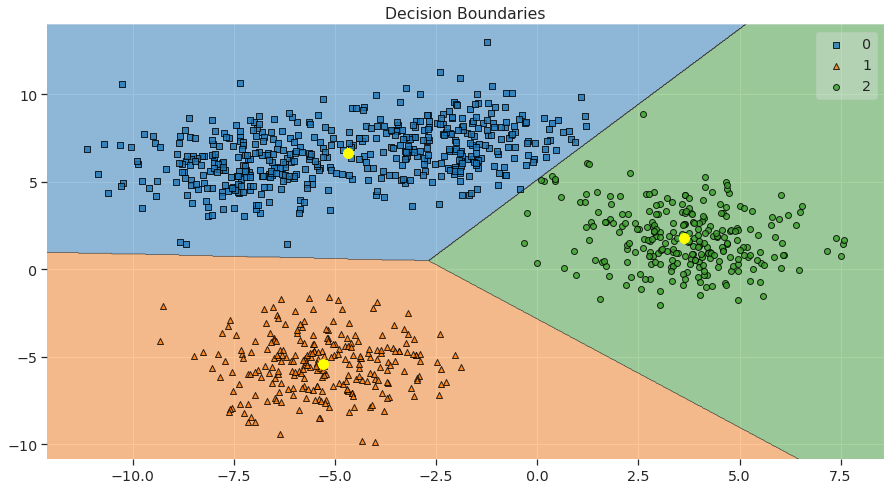

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Decision Boundaries')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='yellow')
plt.show()